In [88]:
import matplotlib.pyplot as plt
import csv
import numpy as np
import os
import math
import pandas as pd
import pylab as pl

# Graphs Q7 (Language distribution)

In [89]:
# LANGUAGE COUNTS
def get_language_data_Q7(filename):
    data = {}
    with open(filename) as infile:
        reader = csv.reader(infile)
        next(reader) # skip header
        for r in reader:
            data[r[0].replace('"', '')] = int(r[1].replace('"', ''))
    return data

In [90]:
data = get_language_data_Q7('Results/AllDoms/Q7_res.csv')

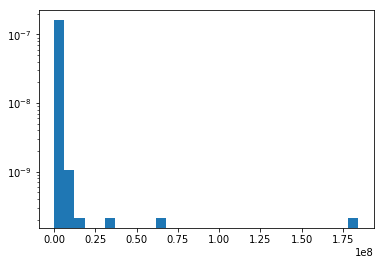

In [93]:
# histogram

fig, ax = plt.subplots()
ax.set_yscale('log')
plt.hist(data.values(), normed=True, bins=30)
plt.show()

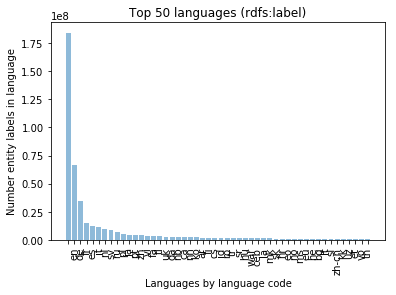

In [94]:
# barchart per language

data_keys_limited = sorted(data, key=data.get,reverse=True)[:50]
data_values_limited = []
for k in data_keys_limited:
    data_values_limited.append(data[k])

ypos = np.arange(len(data_keys_limited))
fig, ax = plt.subplots()

plt.title('Top 50 languages (all subproperties)')
ax.bar(ypos, data_values_limited, align='center', alpha=0.5)

ax.set_xlabel('Languages by language code')
plt.xticks(ypos, data_keys_limited, rotation='vertical')

#ax.set_ylabel('Number entity labels in language (log)')
#ax.set_yscale('log')
ax.set_ylabel('Number entity labels in language')

plt.show()

In [95]:
def get_keys():
    data = {}
    with open('Q7-res.csv') as infile:
        reader = csv.reader(infile)
        next(reader) # skip header
        for r in reader:
            data[r[0].replace('"', '')] = int(r[1].replace('"', ''))
        return sorted(data, key=data.get, reverse=True)[:50]

In [96]:
domainfiles = {}
for filename in os.listdir('Results/PerDom'):
    if filename.strip().startswith('Q7-'):
        print filename
        domain = filename.split('-')[1]
        if domain in domainfiles:
            domainfiles[domain].append(filename)
        else:
            domainfiles[domain] = [filename]
domaindata = {}
for domain, filelist in domainfiles:
    for f in filelist:
        with open('Domains/' + f):
            data = get_language_data_Q7(f)
            for k in keys:
                if k in data:
                    if domain in domaindata:
                        domaindata[domain][k] += data[k]
                        domaindata[domain]['counter'] += 1
                    else:
                        domaindata[domain] = {}
                        domaindata[domain][k] = data[k]
                        domaindata[domain]['counter'] = 0

In [10]:
# TO BE CONTINUED WHEN WE HAVE THE DATA

# Graphs Q2 (Subproperty usage)

In [97]:
def get_data_Q2(filename):
    data = {}
    with open(filename) as infile:
        reader = csv.reader(infile)
        next(reader) # skip header
        for r in reader:
            data[r[0].replace('"', '')] = int(r[1].replace('"', ''))
    return data

In [98]:
data = get_data_Q2('Results/AllDoms/Q2_res.csv')

In [113]:
labels = {}
with open('labeling-properties-prefix.tsv') as infile:
    for line in infile:
        tmp = line.split('\t')
        labels[tmp[0].strip()] = tmp[1].strip()
datashort = {}
for k,v in data.iteritems():
    if k in labels:
        datashort[labels[k]] = v
    else:
        datashort[data[k]] = v

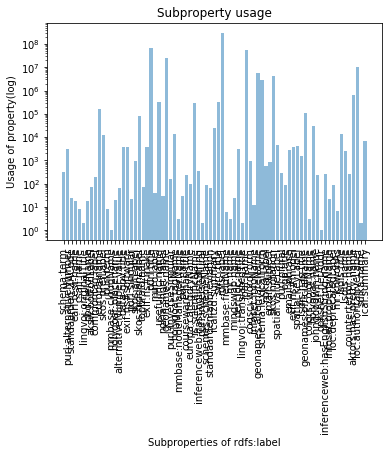

In [114]:
# Bar plot

data_keys_limited = sorted(datashort, key=data.get,reverse=True)
data_values_limited = []
for k in data_keys_limited:
    data_values_limited.append(datashort[k])

ypos = np.arange(len(data_keys_limited))
fig, ax = plt.subplots()

plt.title('Subproperty usage')
ax.bar(ypos, data_values_limited, align='center', alpha=0.5)

ax.set_xlabel('Subproperties of rdfs:label')
plt.xticks(ypos, data_keys_limited, rotation='vertical')

ax.set_ylabel('Usage of property(log)')
ax.set_yscale('log')

plt.show()

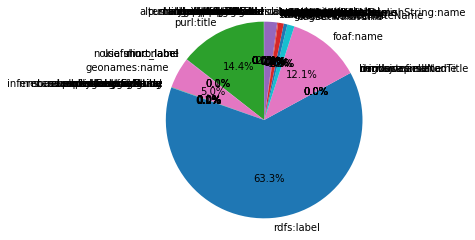

In [116]:
# Pie chart

fig1, ax1 = plt.subplots()
ax1.pie(datashort.values(), labels=datashort.keys(), autopct='%1.1f%%', startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

[3230, 25, 18, 8, 2, 18, 72, 187, 169720, 12515, 8, 1, 20, 65, 3780, 3715, 23, 957, 80996, 76, 3818, 68842253, 39, 331196, 31, 24057872, 162, 14236, 3, 30, 233, 103, 283243, 340, 2, 86, 69, 23945, 327571, 303240563, 6, 3, 25, 3265, 2, 57911283, 943, 12, 5623730, 2892385, 593, 877, 4352618, 4587, 285, 85, 2766, 3823, 4380, 1549, 107975, 3, 30247, 250, 1, 274, 23, 87, 7, 13158, 2649, 271, 649432, 10130250, 2, 6684]


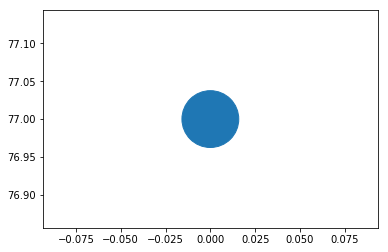

<Figure size 7200x7200 with 0 Axes>

In [119]:
length = len(datashort)

x = range(0,length, 100)
y = range(length, length*2, 100)
#values = [math.log(d) for d in data.values()]
area = datashort.values()[1:]
print datashort.values()[1:]

plt.scatter(x, y, s=area)
plt.figure(figsize=(100,100))
plt.show()

IndexError: list index out of range

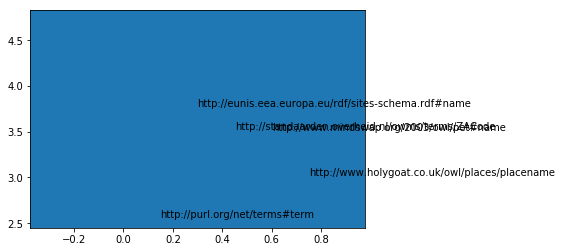

In [14]:
y = [2.56422, 3.77284, 3.52623, 3.51468, 3.02199]
z = [0.15, 0.3, 0.45, 0.6, 0.75]
area = data.values()[:10]
n = ['a', 'b', 'b', 'd', 'e']

fig, ax = plt.subplots()
ax.scatter(z, y, s=area)

for i, txt in enumerate(data.keys()[:10]):
    ax.annotate(txt, (z[i], y[i]))

# Graphs Q3 and Q4 (Completeness cross-domain)

In [15]:
domainfiles = {}
for filename in os.listdir('Results/PerDom'):
    if filename.strip().startswith('Q3-'):
        domain = filename.split('-')[1]
        if domain in domainfiles:
            domainfiles[domain].append(filename)
        else:
            domainfiles[domain] = [filename]

In [16]:
# @todo: replace total.append(part) with comments when we have data for Q4
filepath = 'Results/PerDom/'
domaindata = {}
for domain, files in domainfiles.iteritems():
    domaindata[domain] = []
    completenesscounter = 0
    total = []
    for f in files:
        part = open(filepath+f).readlines()[1].strip()
        # whole = open(filepath+f.replace('Q3', 'Q4')).readlines()[1]
        if not part.isdigit(): #or not while.isdigit()
            #if part == 0 and whole == 0:
            continue
        #ratio = float(part)/float(whole)
        #total.append(ratio)
        part = float(part) # can be deleted later
        total.append(part)
    domaindata[domain] = total
print domaindata

{'cross_domain': [0.0, 0.0, 0.0, 0.0, 1.0, 4.0, 0.0, 32056.0, 31.0, 9.0, 0.0, 47844.0, 16988226.0, 156163.0, 56.0, 314.0, 1.0, 99.0, 1719.0, 2.0, 1487696.0, 1548770.0, 0.0, 0.0, 0.0, 0.0, 2693251.0, 3072653.0, 9605.0, 0.0, 111.0, 15.0, 0.0, 0.0, 2161699.0, 121848.0, 0.0, 0.0, 0.0, 80.0, 1.0, 0.0, 393889.0, 14162162.0, 518.0], 'government': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 44.0, 0.0, 3.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 117563.0, 0.0, 0.0, 0.0, 0.0, 294.0, 0.0, 0.0, 0.0, 0.0, 2620.0, 0.0, 0.0, 0.0, 190.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 373.0, 1151534.0, 0.0, 0.0, 0.0, 0.0, 0.0, 31784.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'geography': [512.0, 117.0, 14350.0, 0.0, 0.0, 864.0, 9539429.0, 4.0, 0.0, 0.0, 9923812.0, 7501163.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4377.0, 0.0]}


In [17]:
plotdata = {}
for domain, values in domaindata.iteritems():
    plotdata[domain] = np.average(values)

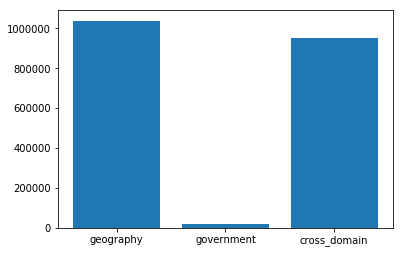

In [18]:
plt.bar(range(len(plotdata)), list(plotdata.values()), align='center')
plt.xticks(range(len(plotdata)), list(plotdata.keys()))
plt.show()

# Graphs Q8 and Q4 (Unambiguity cross-domain)

In [19]:
domainfiles = {}
for filename in os.listdir('Results/PerDom'):
    if filename.strip().startswith('Q8-'):
        domain = filename.split('-')[1]
        if domain in domainfiles:
            domainfiles[domain].append(filename)
        else:
            domainfiles[domain] = [filename]

In [20]:
# @todo: replace total.append(part) with comments when we have data for Q4
filepath = 'Results/PerDom/'
domaindata = {}
for domain, files in domainfiles.iteritems():
    domaindata[domain] = []
    completenesscounter = 0
    total = []
    for f in files:
        part = open(filepath+f).readlines()[1].strip()
        # whole = open(filepath+f.replace('Q3', 'Q4')).readlines()[1]
        if not part.isdigit(): #or not while.isdigit()
            #if part == 0 and whole == 0:
            continue
        #ratio = float(part)/float(whole)
        #total.append(ratio)
        part = float(part) # can be deleted later
        total.append(part)
    domaindata[domain] = total
print domaindata

{'cross_domain': [0.0, 393888.0, 4620853.0, 0.0, 161070.0, 5996.0, 258538.0]}


In [21]:
plotdata = {}
for domain, values in domaindata.iteritems():
    plotdata[domain] = np.average(values)

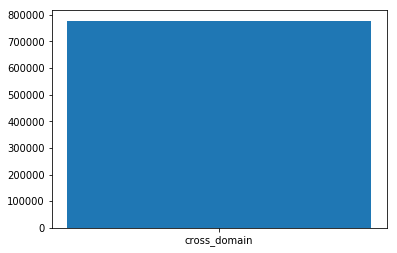

In [22]:
plt.bar(range(len(plotdata)), list(plotdata.values()), align='center')
plt.xticks(range(len(plotdata)), list(plotdata.keys()))
plt.show()

# Radar Chart all domains

Metrics: 
* Completeness (Q3/Q4)
* Completeness in English (Q5/Q4)
* Number of languages (Q6)
* Ambigious entities (Q8/Q4)
* Labeled Object (Q10/Q9)

In [23]:
# Completeness
part = int(open('Results/AllDoms/Q3_res.csv').readlines()[1].strip())
whole = int(open('Results/AllDoms/Q4_res.csv').readlines()[1].strip())
completeness = (float(part)/float(whole)) * 100

In [24]:
# Completeness in English
part = int(open('Results/AllDoms/Q5_res.csv').readlines()[1].strip())
whole = int(open('Results/AllDoms/Q4_res.csv').readlines()[1].strip())
completeness_en = (float(part)/float(whole)) * 100

In [25]:
# Number of languages
languages = int(open('Results/AllDoms/Q6_res.csv').readlines()[1].strip())

In [26]:
# Unambiguity
part = int(open('Results/AllDoms/Q8_res.csv').readlines()[1].strip())
whole = int(open('Results/AllDoms/Q4_res.csv').readlines()[1].strip())
ambiguity = (float(part)/float(whole)) * 100
unambiguity = 100 - ambiguity

In [33]:
# Labeled Object
# @todo
labeledobject = 100

In [56]:
data = {'Completeness': completeness, 'Completeness en': completeness_en, 'Unambiguity': unambiguity, 'Labeled object': labeledobject}

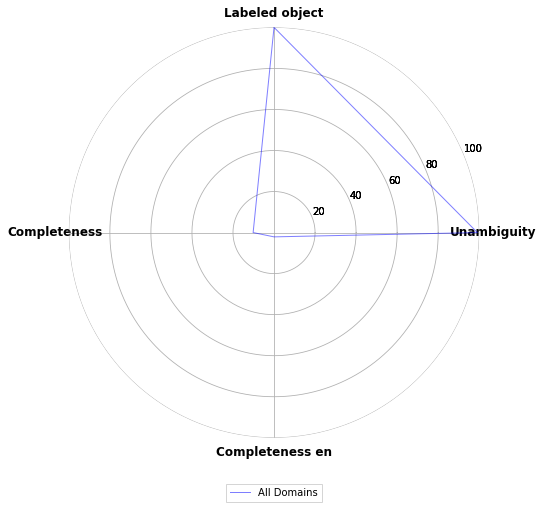

In [84]:
class Radar(object):

    def __init__(self, fig, titles, rect=None):
        if rect is None:
            rect = [0.05, 0.05, 0.95, 0.95]

            self.n = len(titles)
            self.angles = [a if a <=360. else a - 360. for a in np.arange(90, 90+360, 360.0/self.n)]
            self.axes = [fig.add_axes(rect, projection="polar", label="axes%d" % i)
                             for i in range(self.n)]

            self.ax = self.axes[0]
            self.ax.set_thetagrids(self.angles, labels=titles, fontsize=12, weight="bold")
            #self.ax.yaxis.grid(False)
            c = 0

            for ax in self.axes[1:]:
                ax.patch.set_visible(False)
                ax.grid("off")
                ax.xaxis.set_visible(False)

            for ax, angle in zip(self.axes, self.angles):
                #ax.set_rgrids(range(10, 110, 10), angle=angle, fontsize=9)
                ax.spines["polar"].set_visible(False)
                ax.set_ylim(0, 100)

    def plot(self, values, *args, **kw):
        angle = np.deg2rad(np.r_[self.angles, self.angles[0]])
        values = np.r_[values, values[0]]
        self.ax.plot(angle, values, *args, **kw)

fig = pl.figure(figsize=(20, 20))
data = {'Completeness': completeness, 'Completeness en': completeness_en, 'Unambiguity': unambiguity, 'Labeled object': labeledobject}
titles = data.keys()


radar = Radar(fig, titles)
radar.plot(data.values(),  "-", lw=1, color="b", alpha=.5, label="All Domains")


radar.ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.10),
      fancybox=False, shadow=False, ncol=7)


fig = py.gcf()
fig.set_size_inches(6, 10, forward=True)
fig.show()
fig.savefig('test2png.png', dpi=100, bbox_inches="tight", pad_inches=1)


# Radar Chart cross-domain

In [86]:
# @todo: as above, just multilpe
# radar.plot(data.values(),  "-", lw=1, color="b", alpha=.5, label="All Domains")